In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import mapel.elections as mapel
import scripts.experiments as experiments
import os
import numpy as np
from scripts.approvalwise_vector import add_sampled_elections_to_experiment, get_approvalwise_vectors, load_from_text_file
from matplotlib import ticker

In [9]:
family = 'euclidean'
num_candidates = 35
num_voters = 80
heuristics = [
    'greedy_dp',
    'pairs',
    # 'basin_hopping',
    'basin_hopping_random',
]
exact_algorithm = 'gurobi'

results_dir = os.path.join('results', f'{num_candidates}x{num_voters}', family, 'one_step_metric')

In [42]:
one_step_metrics = {}
for heuristic in heuristics:
    report = pd.read_csv(os.path.join(results_dir, heuristic, f'report.csv'))
    reference_report = pd.read_csv(os.path.join(
        results_dir,  heuristic, f'reference-report.csv'))
    
    merged = pd.merge(report, reference_report, on=('experiment_size', 'idx'), suffixes=('', '_reference'), how='inner')
    num_experiments = len(merged['idx'].unique())
    merged['one_step_metric'] = merged['distance'] / merged['distance_reference']
    merged = merged[['experiment_size', 'idx', 'one_step_metric']]
    merged = merged.groupby('experiment_size').aggregate(['mean', 'std']).reset_index()
    merged['num_experiments'] = num_experiments
    one_step_metrics[heuristic] = merged[['experiment_size', 'num_experiments', 'one_step_metric']]

In [43]:
one_step_metrics[heuristic].head()

experiment_size num_experiments one_step_metric          
                                             mean       std
0              64              10        0.853832  0.170849
1              65              10        0.839111  0.165308
2              66              10        0.743760  0.211276
3              67              10        0.927797  0.427538
4              68              10        0.734816  0.212271

In [47]:
def plot_one_step_metric(algorithm, one_step_metrics):
    metric = one_step_metrics[algorithm]['one_step_metric']['mean']
    std = one_step_metrics[algorithm]['one_step_metric']['std']
    experiment_size = one_step_metrics[algorithm]['experiment_size']
    tries = one_step_metrics[algorithm]['num_experiments'][0]
    fig, ax = plt.subplots(dpi=200)
    ax.set_xlabel('Number of starting elections from the reference')
    ax.set_ylabel('Percentage of summed distances to the reference')
    ax.bar(experiment_size, metric, yerr=std, capsize=2)
    ax.yaxis.set_major_formatter(ticker.PercentFormatter(1))
    ax.set_ylim(0, 1)
    ax.set_title(f'Farthest elections for {algorithm}, tries={tries}')
    return fig, ax

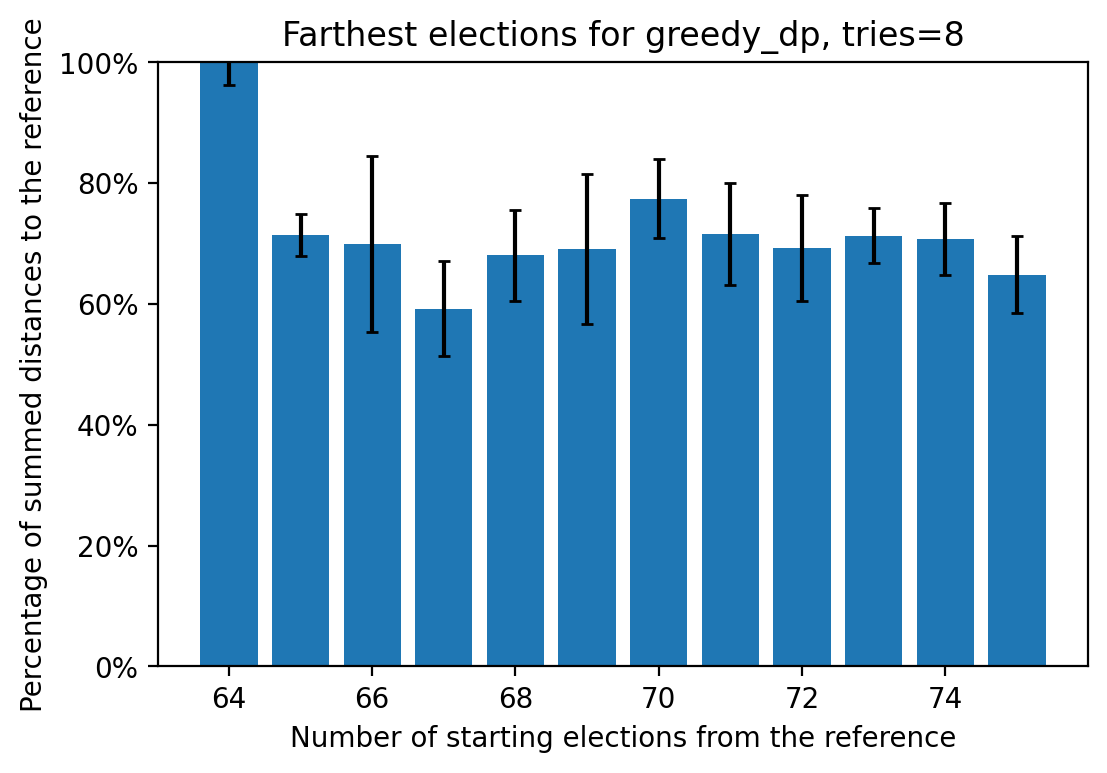

In [48]:
algorithm = 'greedy_dp'
fig, ax = plot_one_step_metric(algorithm, one_step_metrics)

/Users/janix4000/miniconda3/envs/ml/lib/python3.11/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/janix4000/miniconda3/envs/ml/lib/python3.11/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


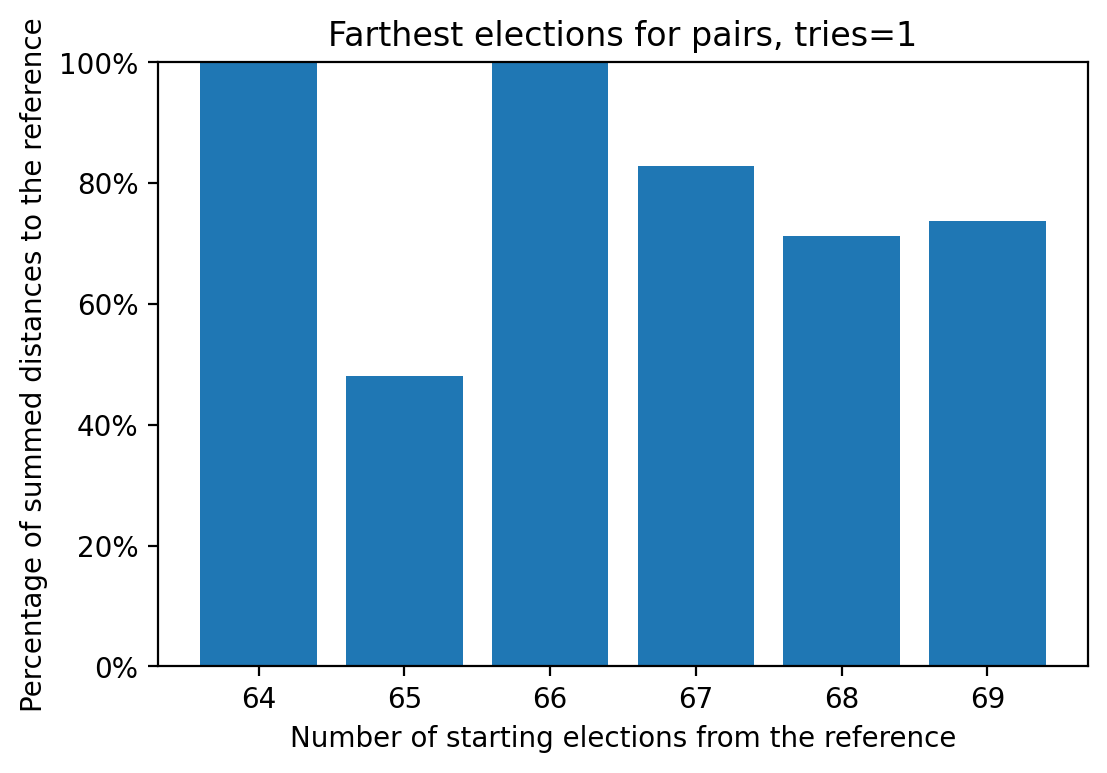

In [50]:
algorithm = 'pairs'
fig, ax = plot_one_step_metric(algorithm, one_step_metrics)

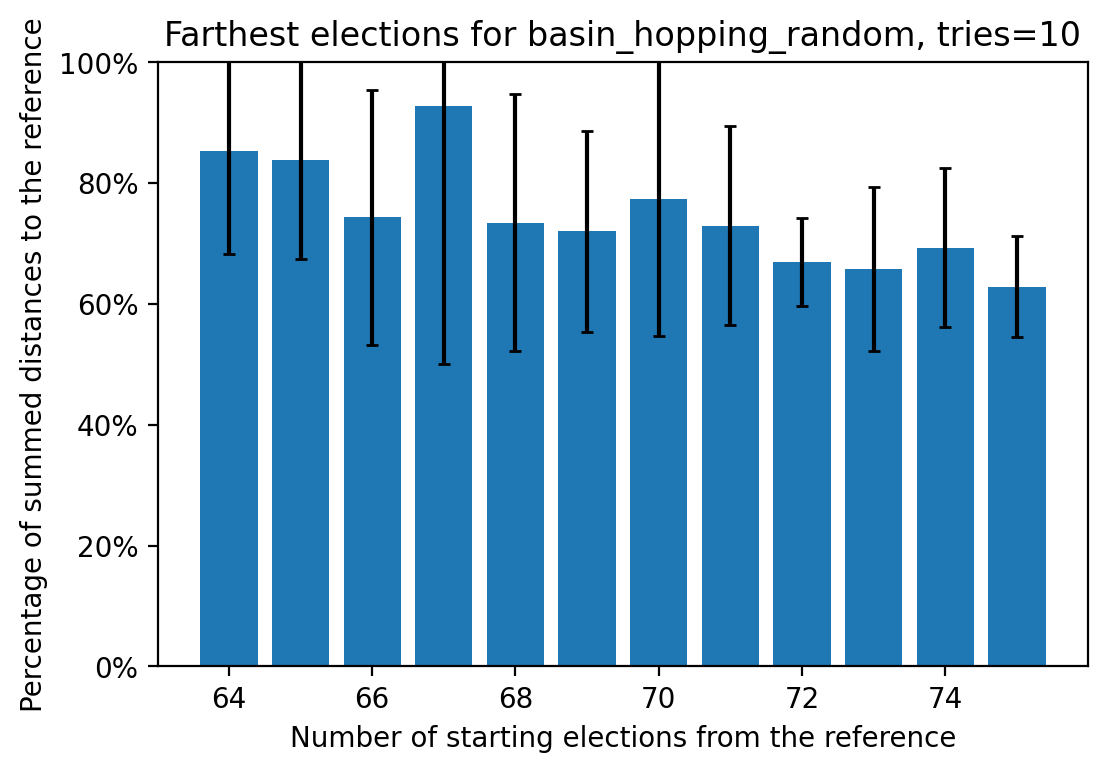

In [51]:
algorithm = 'basin_hopping_random'
fig, ax = plot_one_step_metric(algorithm, one_step_metrics)